In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Stock_Market_Dataset.csv")

#Display the first few rows to understand the data
df.head()
                 

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [121]:
#Display the summary of the dataset
df.info()

#Check for missing values
missing_values = df.isnull().sum()

#Display the missing Values
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [122]:
#Display the specific columns that has missing values

missing_columns = df.columns[df.isnull().sum() > 0]
print("Columns with missing values:", missing_columns)


Columns with missing values: Index(['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.',
       'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.'],
      dtype='object')


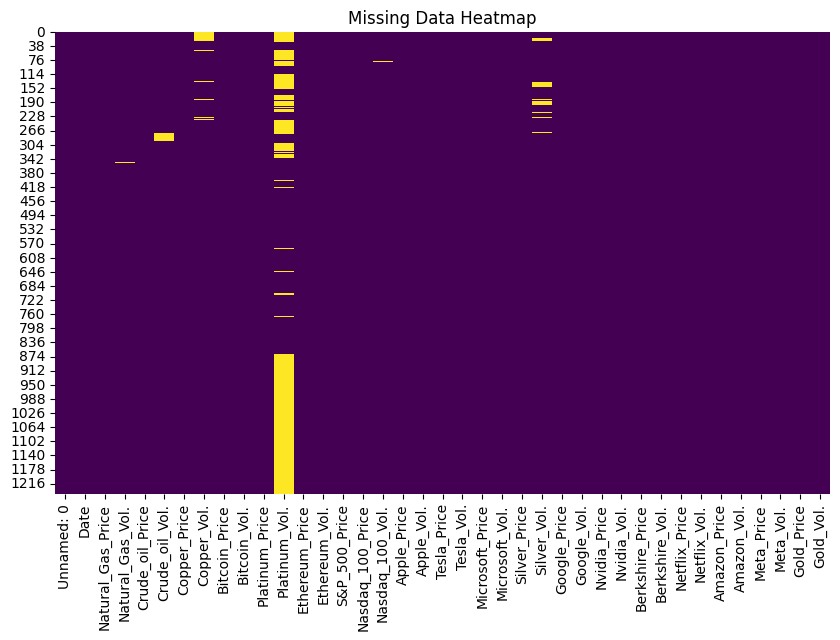

In [123]:
#Identify missing data patterns

#Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

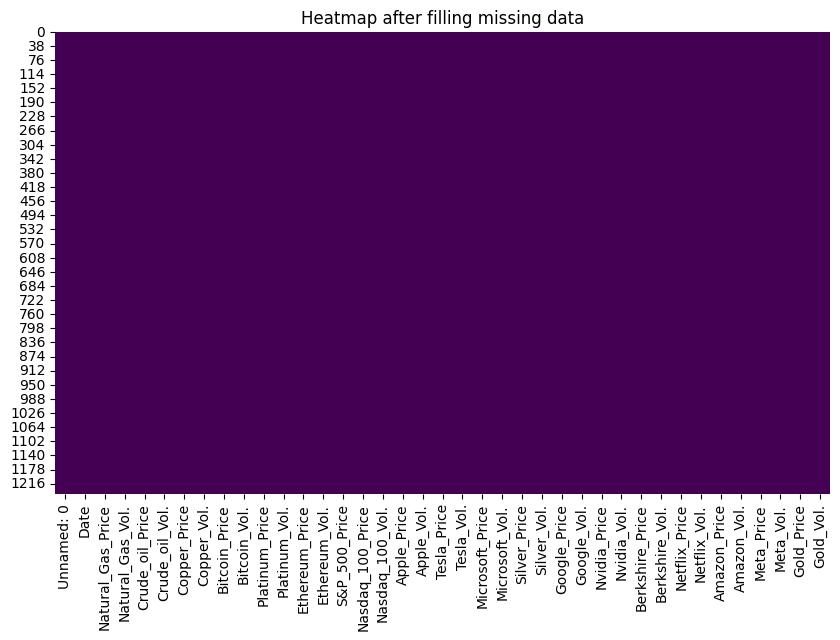

In [124]:
#Handling Missing Values
# Columns with missing values
missing_columns = [
    'Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.',
    'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.'
]

# Fill missing values with the mean
for column in missing_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Check again for missing values
df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap after filling missing data')
plt.show()


In [125]:
#Removing Duplicates

# Find duplicates
duplicates = df[df.duplicated()]
duplicates

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm duplicates removed
df.duplicated().sum()


0

In [126]:
#Fix data types

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


# List of columns that are currently in object type
object_columns = ['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 
                  'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price']

# Remove commas and convert to float
for column in object_columns:
    df[column] = df[column].replace({',': ''}, regex=True).astype(float)

# Check the data types again
df.dtypes


# Check data types again
df.dtypes


Unnamed: 0                    int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price               float64
Bitcoin_Vol.                float64
Platinum_Price              float64
Platinum_Vol.               float64
Ethereum_Price              float64
Ethereum_Vol.               float64
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                 float64
Nvidia_Price                

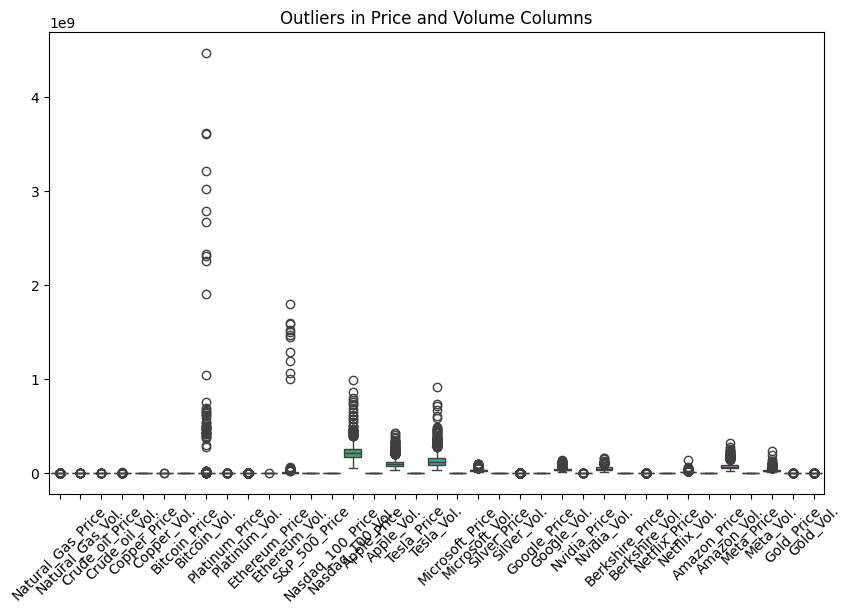

In [127]:
#Visualize Outliers
#Generating a boxplot
numeric_columns = ['Natural_Gas_Price','Natural_Gas_Vol.','Crude_oil_Price','Crude_oil_Vol.','Copper_Price','Copper_Vol.','Bitcoin_Price','Bitcoin_Vol.','Platinum_Price','Platinum_Vol.','Ethereum_Price','Ethereum_Vol.','S&P_500_Price','Nasdaq_100_Price','Nasdaq_100_Vol.','Apple_Price','Apple_Vol.','Tesla_Price','Tesla_Vol.','Microsoft_Price','Microsoft_Vol.','Silver_Price','Silver_Vol.','Google_Price','Google_Vol.','Nvidia_Price','Nvidia_Vol.','Berkshire_Price','Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.' ]


# Boxplot for visualizing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Outliers in Price and Volume Columns')
plt.xticks(rotation=45)
plt.show()

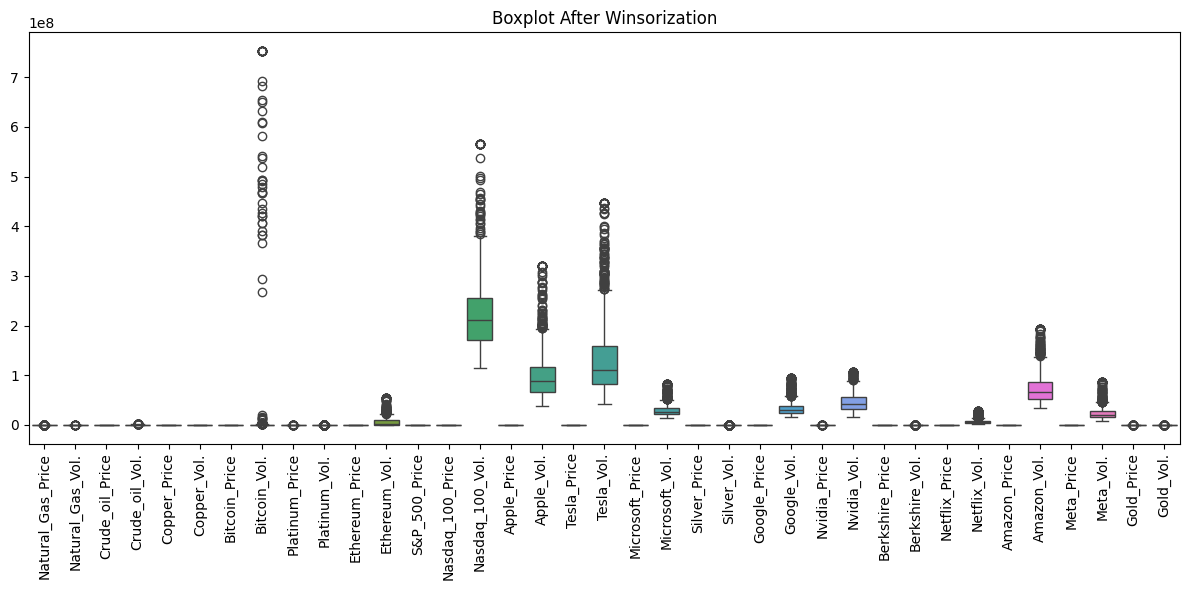

In [128]:
numeric_columns = ['Natural_Gas_Price','Natural_Gas_Vol.','Crude_oil_Price','Crude_oil_Vol.','Copper_Price','Copper_Vol.','Bitcoin_Price','Bitcoin_Vol.','Platinum_Price','Platinum_Vol.','Ethereum_Price','Ethereum_Vol.','S&P_500_Price','Nasdaq_100_Price','Nasdaq_100_Vol.','Apple_Price','Apple_Vol.','Tesla_Price','Tesla_Vol.','Microsoft_Price','Microsoft_Vol.','Silver_Price','Silver_Vol.','Google_Price','Google_Vol.','Nvidia_Price','Nvidia_Vol.','Berkshire_Price','Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 'Gold_Vol.' ]

# Loop through each numeric column and apply winsorization
for column in numeric_columns:
    if column in df.columns and pd.api.types.is_numeric_dtype(df[column]):
        df[column] = winsorize(df[column], limits=[0.01, 0.01])  # Apply 1% winsorization from both ends

# Boxplot after Winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot After Winsorization")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


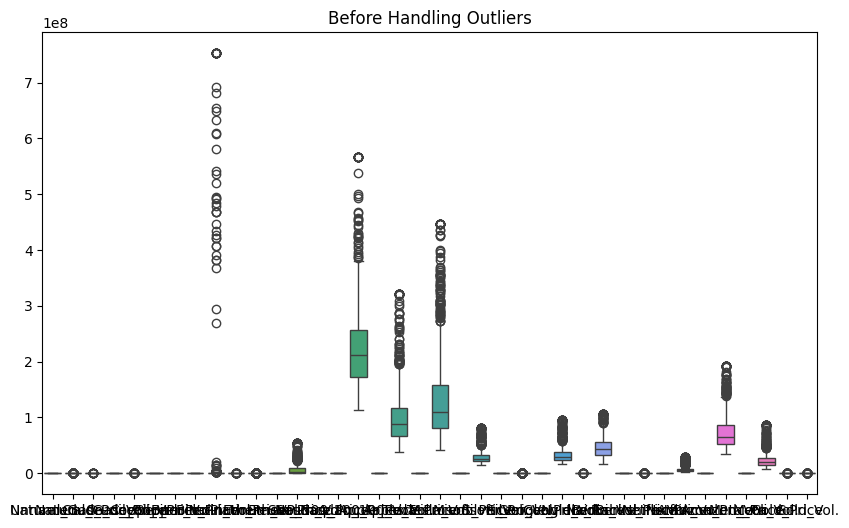

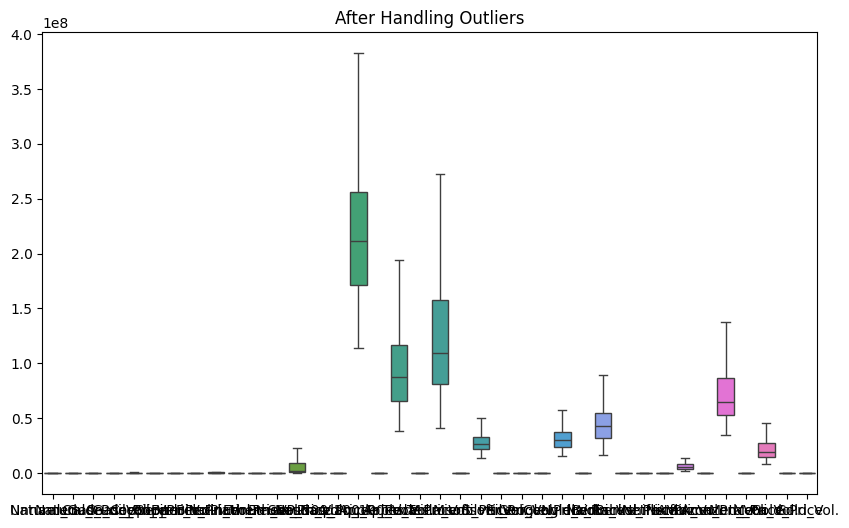

In [129]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition
outlier_condition = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))

# Plotting the data before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Before Handling Outliers")
plt.show()

# Apply clipping to numeric columns where outliers are found
for col in numeric_columns:
    df[col] = np.where(outlier_condition[col], np.clip(df[col], Q1[col] - 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col]), df[col])

# Plotting the data after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("After Handling Outliers")
plt.show()


In [130]:
#Save the cleaned data set
df.to_csv('cleaned_Stock_Market_Analysis.csv', index=False)

#Display the summary of the dataset
df.info()

#Check for missing values
missing_values = df.isnull().sum()

#Display the missing Values
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1243 non-null   int64         
 1   Date               1243 non-null   datetime64[ns]
 2   Natural_Gas_Price  1243 non-null   float64       
 3   Natural_Gas_Vol.   1243 non-null   float64       
 4   Crude_oil_Price    1243 non-null   float64       
 5   Crude_oil_Vol.     1243 non-null   float64       
 6   Copper_Price       1243 non-null   float64       
 7   Copper_Vol.        1243 non-null   float64       
 8   Bitcoin_Price      1243 non-null   float64       
 9   Bitcoin_Vol.       1243 non-null   float64       
 10  Platinum_Price     1243 non-null   float64       
 11  Platinum_Vol.      1243 non-null   float64       
 12  Ethereum_Price     1243 non-null   float64       
 13  Ethereum_Vol.      1243 non-null   float64       
 14  S&P_500_

Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [131]:
df = pd.read_csv('cleaned_Stock_Market_Analysis.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Step 1: Date-Based Features
df['Year'] = df.index.to_series().dt.year
df['Month'] = df.index.to_series().dt.month
df['Day'] = df.index.to_series().dt.day
df['Day_of_Week'] = df.index.to_series().dt.dayofweek
df['Is_Weekend'] = (df.index.to_series().dt.weekday >= 5).astype(int)  # Binary flag for weekends
df['Quarter'] = df.index.to_series().dt.quarter

# Define price and volume columns
price_columns = [
    'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 
    'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 
    'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 
    'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 
    'Gold_Price'
]
volume_columns = [
    'Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 
    'Platinum_Vol.', 'Ethereum_Vol.', 'Nasdaq_100_Vol.', 'Apple_Vol.', 'Tesla_Vol.', 
    'Microsoft_Vol.', 'Silver_Vol.', 'Google_Vol.', 'Nvidia_Vol.', 'Berkshire_Vol.', 
    'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.', 'Gold_Vol.'
]

# Step 2: Feature Engineering
# Lag features
for lag in range(1, 3):  # Create Lag1 and Lag2 for all specified columns
    for col in price_columns + volume_columns:
        df[f'{col}_Lag{lag}'] = df[col].shift(lag)

# Percentage change in price
for col in price_columns:
    df[f'{col}_Pct_Change'] = df[col].pct_change()

# Moving averages (7-day) for price and volume columns
for col in price_columns + volume_columns:
    df[f'{col}_7Day_MA'] = df[col].rolling(window=7).mean()

# Price-to-Volume ratio features
for price_col, vol_col in zip(price_columns, volume_columns):
    df[f'{price_col}_Volume_Ratio'] = df[price_col] / df[vol_col]

# Step 3: Handling Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill as a fallback

# Step 4: Standardization
scaler = StandardScaler()
numeric_columns = (
    price_columns + volume_columns +
    [f'{col}_Lag1' for col in price_columns + volume_columns] +
    [f'{col}_Lag2' for col in price_columns + volume_columns] +
    [f'{col}_Pct_Change' for col in price_columns] +
    [f'{col}_7Day_MA' for col in price_columns + volume_columns] +
    [f'{price_col}_Volume_Ratio' for price_col, vol_col in zip(price_columns, volume_columns)]
)

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 5: Quality Check
# Ensure no NaNs or infinities are present after transformations
if df.isnull().values.any():
    raise ValueError("NaN values detected in the dataset after processing.")
if np.isinf(df.values).any():
    raise ValueError("Infinity values detected in the dataset after processing.")

# Save the engineered dataset to a new CSV file
df.to_csv('engineered_stock_market_data.csv', index=False)

# Step 6: Display dataset summary for validation
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Show the first few rows of the engineered data
print("\nFirst Few Rows of the Dataset:")
print(df.head())


/tmp/ipykernel_822/1649354328.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_Pct_Change'] = df[col].pct_change()
/tmp/ipykernel_822/1649354328.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_7Day_MA'] = df[col].rolling(window=7).mean()
/tmp/ipykernel_822/1649354328.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1243 entries, 2024-02-02 to 2019-02-04
Columns: 192 entries, Unnamed: 0 to Meta_Price_Volume_Ratio
dtypes: float64(185), int32(5), int64(2)
memory usage: 1.8 MB

Summary Statistics:
        Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1243.000000       1.243000e+03      1.243000e+03     1.243000e+03   
mean    621.000000       9.146166e-17     -5.716353e-17    -4.573083e-16   
std     358.967501       1.000402e+00      1.000402e+00     1.000402e+00   
min       0.000000      -1.142975e+00     -2.041861e+00    -2.376506e+00   
25%     310.500000      -6.742686e-01     -6.192846e-01    -6.233131e-01   
50%     621.000000      -4.413936e-01     -5.612187e-02     8.020381e-02   
75%     931.500000       4.477357e-01      6.047340e-01     6.388863e-01   
max    1242.000000       2.130742e+00      2.440762e+00     2.392079e+00   

       Crude_oil_Vol.  Copper_Price   Copper_Vol.  Bitcoin_Price  

Training LinearRegression...
Training Ridge...
Training Lasso...
Best Model: Ridge(alpha=0.1)
Model Performance on Test Set:
MAE: 0.02
MSE: 0.00
R² Score: 1.00


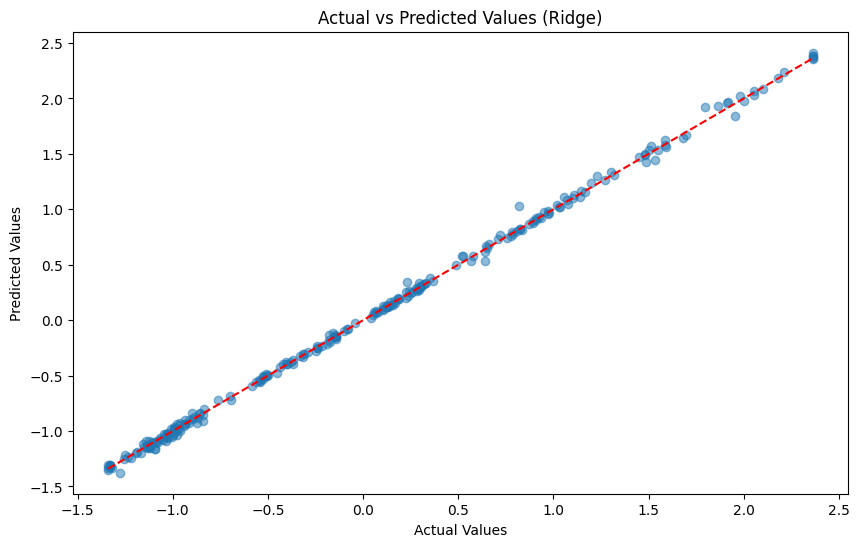

In [135]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('engineered_stock_market_data.csv')

# Define target and features
target = 'Bitcoin_Price'  # Target variable
features = df.columns.difference([target])  # All columns except the target

# Train-Test Split
X = df[features].dropna()  # Features
y = df[target].dropna()  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a set of regression models to try
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Define hyperparameter grid for each model
param_grids = {
    'LinearRegression': {},  # No hyperparameters for vanilla Linear Regression
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]}
}

# Using KFold for cross-validation (for regression tasks)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for the best model
best_model = None
best_score = -np.inf

# Iterate through each model and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training {model_name}...")
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',  # Optimize for R² score
        cv=kfold,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # If this model is the best so far, save it
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Model Performance on Test Set:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")

# Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values ({type(best_model).__name__})")
plt.show()
